In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

#############LOADING DATASET #########################
df = pd.read_csv("credit_train.csv")

#removing unwanted features like LOanID and CustomerID
df= df.drop(df[['Loan ID','Customer ID']], axis=1)

#Drop record if it does not have at least 'n' values that are **not** NaN out of 17 columns
#finding val of 'n', we will see how many records are dropped at each threshlod val
#for  i in range(1,17):
#    mod_df  = df.dropna(thresh=i)
#    total_rows = mod_df.count
#    print('With threshold value {0} the no. of records are {1}'.format(i,total_rows))

#thresh12-10000, thresh=13-99999, thresh=14-99k, thresh=15-89k, thresh=16-79k, thresh=17-36.5k
df = df.dropna(thresh=17)

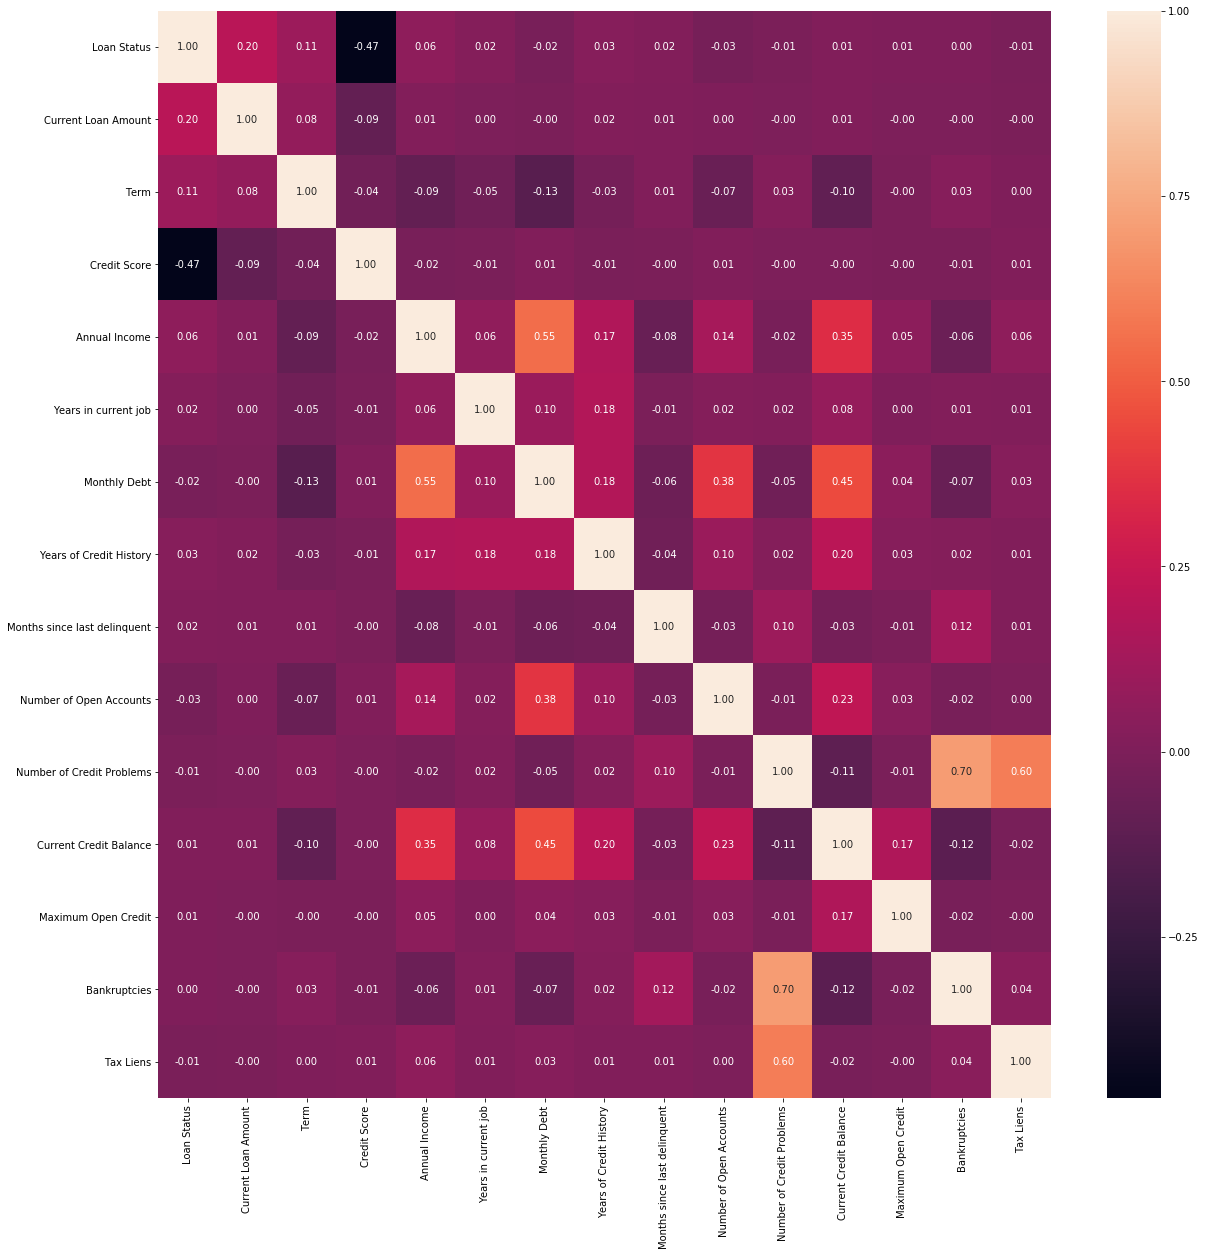

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [88]:
############################# Execute if you have selected threshold value other than 17 in above cell ##############

#removing string data from column to make it float type
df = df.replace({'Years in current job' : '[A-Za-z+<>]'},' ' , regex=True)
#changing object value to float
df['Years in current job'] = df['Years in current job'].astype(np.float64)
#Finding the median value in the rspective columns
credit_score_median = df['Credit Score'].median()
Annual_Income_median = df['Annual Income'].median()
Years_in_current_job_median = df['Years in current job'].median()
#fill NaN values
df['Credit Score'].fillna(credit_score_median,inplace=True)
df['Annual Income'].fillna(Annual_Income_median, inplace=True)
df['Years in current job'].fillna(Years_in_current_job_median, inplace=True)
df['Months since last delinquent'].fillna(0,inplace=True)
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median(),inplace=True)
df['Bankruptcies'].fillna(0,inplace=True)
df['Tax Liens'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
Loan Status                     36423 non-null object
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens      

In [89]:
#################################### Checking no. of Loan payers / non-payers #############

In [90]:
df.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,Fully Paid,99999999.0,Short Term,728.0,714628.0,3.0,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,Fully Paid,99999999.0,Short Term,740.0,776188.0,1.0,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
14,Fully Paid,234124.0,Short Term,727.0,693234.0,10.0,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
17,Fully Paid,666204.0,Long Term,723.0,1821967.0,10.0,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,Charged Off,317108.0,Long Term,687.0,1133274.0,8.0,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
25,Fully Paid,465410.0,Long Term,688.0,1722654.0,3.0,Rent,Buy House,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0
28,Fully Paid,99999999.0,Short Term,746.0,1749748.0,10.0,Home Mortgage,Debt Consolidation,19247.19,20.0,32.0,17.0,0.0,224390.0,295240.0,0.0,0.0


In [91]:
df_paid = df[df['Loan Status']=='Fully Paid']
df_non_paid = df[df['Loan Status']=='Charged Off']

In [92]:
print("Number of people who paid their loan fully: {}".format(df_paid.count()))
print("Number of people who didn't paid their loan fully: {}".format(df_non_paid.count()))

Number of people who paid their loan fully: Loan Status                     28972
Current Loan Amount             28972
Term                            28972
Credit Score                    28972
Annual Income                   28972
Years in current job            28972
Home Ownership                  28972
Purpose                         28972
Monthly Debt                    28972
Years of Credit History         28972
Months since last delinquent    28972
Number of Open Accounts         28972
Number of Credit Problems       28972
Current Credit Balance          28972
Maximum Open Credit             28972
Bankruptcies                    28972
Tax Liens                       28972
dtype: int64
Number of people who didn't paid their loan fully: Loan Status                     7451
Current Loan Amount             7451
Term                            7451
Credit Score                    7451
Annual Income                   7451
Years in current job            7451
Home Ownership          

In [93]:
#dealing  with categorical values
from sklearn import preprocessing

df_preprocessed = df.copy()

# create a variable with the values of the target variable
#loan_target = df['Loan Status']

#remove it from the dataframe so it only contains the features that our model should use
df= df.drop(df[['Home Ownership', 'Purpose']], axis=1)

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
df['Loan Status'] = df['Loan Status'].astype(np.str)
df['Loan Status'] = label_encoder.fit_transform(df['Loan Status'])

label_encoder1 = preprocessing.LabelEncoder()
df['Term'] = label_encoder1.fit_transform(df['Term'])

# encode features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df_preprocessed[['Home Ownership', 'Purpose']]).toarray(), columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 20 columns):
Home Ownership_HaveMortgage     36423 non-null float64
Home Ownership_Home Mortgage    36423 non-null float64
Home Ownership_Own Home         36423 non-null float64
Home Ownership_Rent             36423 non-null float64
Purpose_Business Loan           36423 non-null float64
Purpose_Buy House               36423 non-null float64
Purpose_Buy a Car               36423 non-null float64
Purpose_Debt Consolidation      36423 non-null float64
Purpose_Educational Expenses    36423 non-null float64
Purpose_Home Improvements       36423 non-null float64
Purpose_Medical Bills           36423 non-null float64
Purpose_Other                   36423 non-null float64
Purpose_Take a Trip             36423 non-null float64
Purpose_major_purchase          36423 non-null float64
Purpose_moving                  36423 non-null float64
Purpose_other                   36423 non-null float64
Purpose_ren

In [ ]:
#################### Run this cell only if you want to add One hot encoding values for columns ['Home Ownership', 'Purpose']

# encode features
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df_preprocessed[['Home Ownership', 'Purpose']]).toarray(), columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()

In [94]:
df.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,1,99999999.0,1,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,1.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,1,548746.0,1,678.0,2559110.0,2.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,1,99999999.0,1,728.0,714628.0,3.0,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,1,99999999.0,1,740.0,776188.0,1.0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
14,1,234124.0,1,727.0,693234.0,10.0,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
17,1,666204.0,0,723.0,1821967.0,10.0,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,0,317108.0,0,687.0,1133274.0,8.0,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
25,1,465410.0,0,688.0,1722654.0,3.0,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0
28,1,99999999.0,1,746.0,1749748.0,10.0,19247.19,20.0,32.0,17.0,0.0,224390.0,295240.0,0.0,0.0


In [95]:
#Run this cell only if you want to add the One Hot Encoded values for ['Home Ownership', 'Purpose'] into training data
#merging categorical encoded dataframe with the main dataframe and deleting unwanted features

df_final = df.reset_index(drop=True).merge(encoded.reset_index(drop=True), left_index=True, right_index=True)

In [97]:
############################## Creating X_train & Y_Train ###################################
# create a variable with the values of the target variable

#If you have added One hot encoding values for columns ['Home Ownership', 'Purpose'], then comment last line & uncomment below  line
#x_train, y_train = df_final.drop(columns='Loan Status'), df_final['Loan Status']

x_train, y_train = df.drop(columns='Loan Status'), df['Loan Status']

In [99]:
#Normalization x_train
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
standard = preprocessing.StandardScaler()

x_train =  standard.fit_transform(x_train)
x_train.head(10)

C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,99999999.0,1.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,217646.0,1.0,730.0,1184194.0,1.0,10855.08,19.6,10.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,548746.0,1.0,678.0,2559110.0,2.0,18660.28,22.6,33.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
x_Train = pd.DataFrame(x_train)
x_Train.head()
y_train = pd.DataFrame(y_train)

In [113]:
x_Train.count()

0     36423
1     36423
2     36423
3     36423
4     36423
5     36423
6     36423
7     36423
8     36423
9     36423
10    36423
11    36423
12    36423
13    36423
dtype: int64

In [115]:
y_train.count()

Loan Status    36423
dtype: int64

In [9]:
#from sklearn.model_selection import StratifiedKFold
#folds = StratifiedKFold(n_splits=5)
#for train_index, test_index in folds.split(merged,loan_target):
#    x_train, x_test, y_train, y_test = df[train_index], df[test_index], loan_target[train_index], loan_target[test_index]

In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import svm as SVM
from sklearn.naive_bayes import GaussianNB as NB
from xgboost import XGBClassifier

In [106]:
# custom imports
from funcs import plot_cv_confidence_vs_profit, score_dmc_profit,dmc_profit,cv_preds_and_confusion_matrix,cv_profits_for_models, profit_scoring
from customClassifiers import CustomModelWithThreshold, TrustHard, PerceptronLearner
from pipes import CustomAttributeAdder,Scaling,RandomAttributeAdder,Transformer,ClfSwitcher

from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier

In [107]:
# use sklearn pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import itertools

In [108]:
#visvualising confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.show()

In [ ]:
###################################### KNN ########################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#param values
neighbors = range(1,32,2)
weight = ["uniform","distance"]
pp = [1,2]
#all param-val dictionary
#grid_params_lr = dict('C':[C_regularization], 'penalty':["l1","l2"], 'intercept_scaling':[ntercept_scal_vals], 'max_iter':[max_iter_vals], 'solver' :["newton-cg", "llbfgs", "sag"])
grid_params_nn = dict(n_neighbors=neighbors, weights=weight, p=pp)
#creating  grid instance  
#KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2)
knn = KNeighborsClassifier()
#neigh_grid=GridSearchCV(knn,grid_params_nn,cv=10)
neigh_ins=RandomizedSearchCV(knn,grid_params_nn,cv=10,scoring='f1',n_iter=100)
neigh_ins.fit(x_Train, y_train)

C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y w

C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A col

C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kanpriya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A col

In [ ]:
neigh_ins.best_score_

In [ ]:
neigh_ins.best_estimator_

In [ ]:
################################### SVC Linear ##############################################
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy
#param values
penal=["l2"]
losses=["hinge","squared_hinge"]
a=numpy.arange(.0000000001, .0001, .00005)
tolerance=a.tolist()
c_regularization=range(10,1500,10)
intercept_scale=range(1,100,4)
max_iters=range(100,4000,100)
#all param-val dictionary
#grid_params_lr = dict('C':[C_regularization], 'penalty':["l1","l2"], 'intercept_scaling':[ntercept_scal_vals], 'max_iter':[max_iter_vals], 'solver' :["newton-cg", "llbfgs", "sag"])
grid_params_svm = dict(penalty=penal, loss=losses, tol=tolerance, C=c_regularization, max_iter=max_iters)
#creating  grid instance  
#KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2)
svm = LinearSVC(fit_intercept=False)
#neigh_grid=GridSearchCV(knn,grid_params_nn,cv=10)
svm_ins=RandomizedSearchCV(svm,grid_params_svm,cv=10,scoring=''f1,n_iter=500)
svm_ins.fit(x_Train, y_train)

In [ ]:
##################################### Para tuningfor sklearn.svm.SVC ###########################################
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy
#param values
c_regularization = range(10,1500,10)
kernel_fn = ["linear", "poly", "rbf", "sigmoid"]
power=range(2,7,1)
b=numpy.arange(.0000000001, .001, .00005)
max_iters=range(100,4000,100)
decision_fn = ["ovo", "ovr"]
tolerance=b.tolist()
#all param-val dictionary
#grid_params_lr = dict('C':[C_regularization], 'penalty':["l1","l2"], 'intercept_scaling':[ntercept_scal_vals], 'max_iter':[max_iter_vals], 'solver' :["newton-cg", "llbfgs", "sag"])
grid_params_sv = dict(kernel=kernel_fn, degree=power, decision_function_shape=decision_fn, tol=tolerance, C=c_regularization, max_iter=max_iters)
#creating  grid instance  
#KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2)
sv = SVC()
#neigh_grid=GridSearchCV(knn,grid_params_nn,cv=10)
sv_ins=RandomizedSearchCV(sv,grid_params_sv,cv=10,scoring='f1',n_iter=200)
sv_ins.fit(x_Train, y_train)

In [ ]:
################################# Hyper-Para tuning for XGboost ########################################## 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy

d=numpy.arange(.05, 5, .05)
lr=d.tolist()
max_dep=[ 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weights=range(1,32,2)
e=numpy.arange(.1, 5, .1)
gammaa=e.tolist()
f=numpy.arange(.1,1,.25)
colsample_bytre=f.tolist()  
    
grid_params_xgb = dict(learning_rate=lr, max_depth=max_dep, min_child_weight=min_child_weights, gamma=gammaa, colsample_bytree=colsample_bytre)
#creating  grid instance  
xgb = XGBClassifier()
xgb_ins=RandomizedSearchCV(xgb,grid_params_xgb,cv=10,scoring='f1',n_iter=200)
xgb_ins.fit(x_Train, y_train)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import svm as SVM
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#######################################  Tuning the parameters for Logistic Regression  ##########################

#from sklearn.grid_search import gridsearchCV
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.grid_search import randomizedsearchCV
#class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, 
#verbose=0, warm_start=False, n_jobs=None)

#param values
max_iter_vals = range(10,1000,10)
intercept_scal_vals = range(1,100,5)
C_regularization = range(100,700,10)
penal = ["l2"]
sol = ["newton-cg", "lbfgs", "sag"]
#all param-val dictionary
#grid_params_lr = dict('C':[C_regularization], 'penalty':["l1","l2"], 'intercept_scaling':[ntercept_scal_vals], 'max_iter':[max_iter_vals], 'solver' :["newton-cg", "llbfgs", "sag"])
grid_params_lr = dict(C=C_regularization, intercept_scaling=intercept_scal_vals, max_iter=max_iter_vals, solver=sol,penalty=penal)
#creating  grid instance  
logreg=LogisticRegression()
#logreg_cv=GridSearchCV(logreg,grid_params,cv=10)
logreg_cv=RandomizedSearchCV(logreg,grid_params_lr,cv=10,scoring='f1',n_iter=20)
logreg_cv.fit(x_Train, y_train)

In [ ]:
cnf_matrix = confusion_matrix(y_train, y_predict)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)